In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [16]:
work = pd.read_csv('train.csv') #readthedataset

In [17]:
work.head()

,# age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028017,0.011349,346.0
1,-0.070900,0.050680,-0.089197,-0.074528,-0.042848,-0.025739,-0.032356,-0.002592,-0.012908,-0.054925,104.0
2,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.026550,-0.039493,-0.022512,0.007207,49.0
3,0.048974,0.050680,0.081097,0.021872,0.043837,0.064134,-0.054446,0.071210,0.032433,0.048628,180.0
4,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0


In [18]:
work.shape #shapeofdataset

(331, 11)

In [19]:
work['Y'].mean()

149.72205438066464

In [20]:
work['Y'].std()

76.79690707556387

<Axes: >

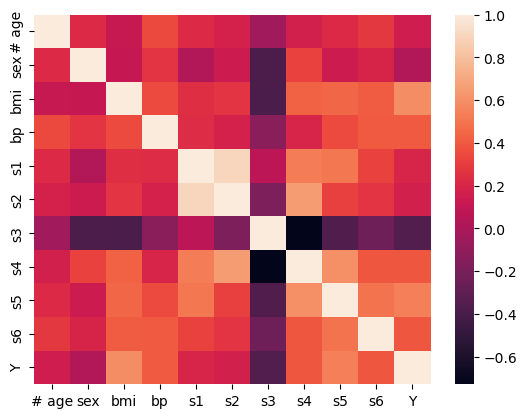

In [21]:
  #correlationheatmap(seaborn )

<Axes: ylabel='# age'>

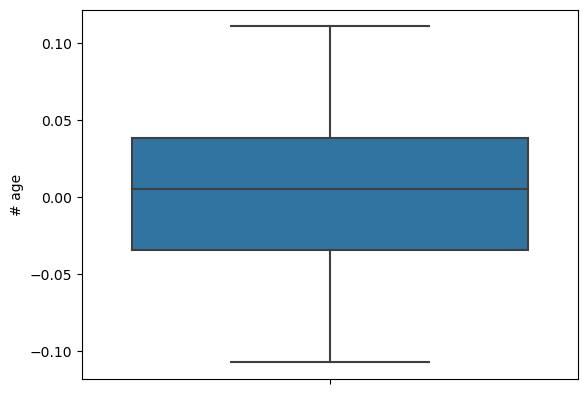

In [22]:
 sns.boxplot(y='# age',data=work) #checkingforoutliers

<Axes: ylabel='bmi'>

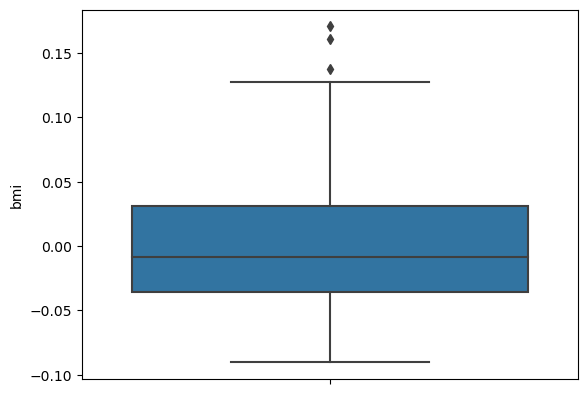

In [23]:
sns.boxplot(y='bmi', data=work) #checkingoutliersfor'bmi'column

In [24]:
work1 = work[work['bmi']<0.125] #Removingtheoutliers

In [25]:
work1.shape #shapeofnewdataset 

(326, 11)

<Axes: ylabel='bmi'>

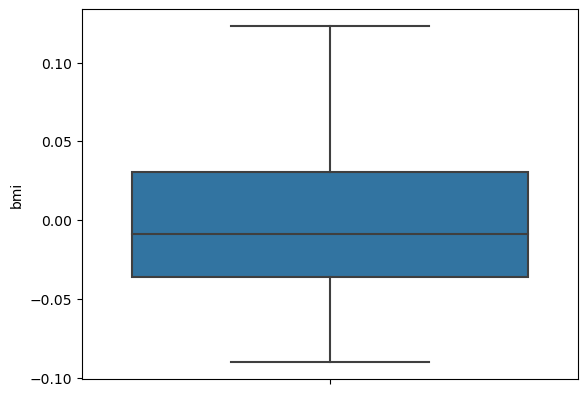

In [26]:
sns.boxplot(y= 'bmi', data=work1)

<Axes: >

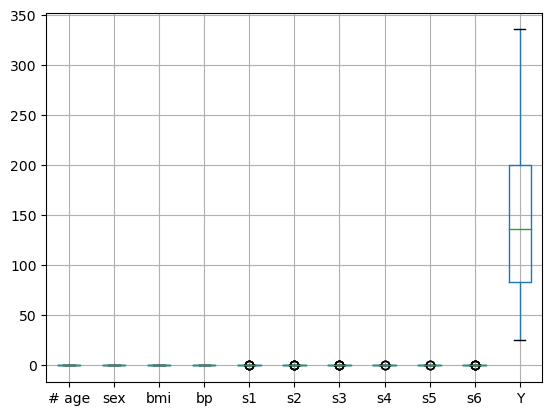

In [28]:
work1.boxplot()

In [29]:
work1.head()

,# age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
1,-0.070900,0.050680,-0.089197,-0.074528,-0.042848,-0.025739,-0.032356,-0.002592,-0.012908,-0.054925,104.0
2,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.026550,-0.039493,-0.022512,0.007207,49.0
3,0.048974,0.050680,0.081097,0.021872,0.043837,0.064134,-0.054446,0.071210,0.032433,0.048628,180.0
4,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
5,-0.060003,0.050680,-0.047163,-0.022885,-0.071743,-0.057681,-0.006584,-0.039493,-0.062913,-0.054925,72.0


In [30]:
dependent_variable ='Y'

In [32]:
independent_variables = work1.columns.tolist()

In [33]:
independent_variables.remove(dependent_variable)

In [35]:
x = np.array(work1[independent_variables].values)

In [37]:
y = np.array(work1[dependent_variable].values)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [39]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = regressor.predict(x_test)

In [41]:
r2_score(y_test, y_pred)

0.4004359699421428

In [42]:
mean_squared_error(y_test, y_pred)

3794.083446351096

In [43]:
print('Variance score: {}'.format(regressor.score(x_test, y_test)))

Variance score: 0.4004359699421428


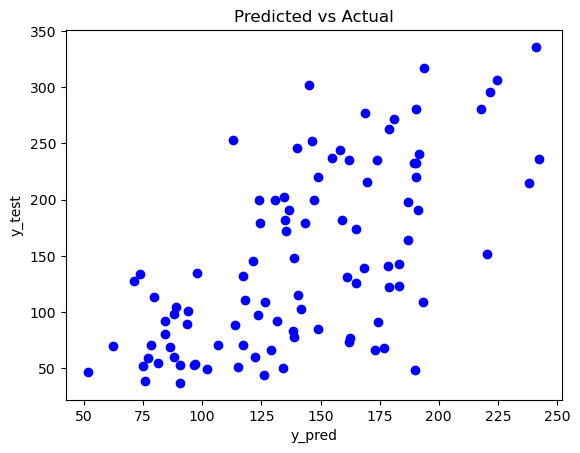

In [44]:
plt.scatter(y_pred, y_test, color= 'blue')
plt.title('Predicted vs Actual')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()